# 1. Setting up package

In [6]:
#Importing libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.models import load_model
import json
from pyvis import network as net

# 2. Data Preprocessing

In [16]:
df_total = pd.DataFrame()
for i in os.listdir('./data/stock_dfs/'):
    if i == '^GSPC.csv':
        continue
    df = pd.read_csv('./data/stock_dfs/' + i)
    prices = list(df['Close'])
    if len(df) < 3524:
        prices = [None] * (3524-len(df)) + prices
    df_total[i[:-4]] = prices

C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\1562733493.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_total[i[:-4]] = prices
C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\1562733493.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_total[i[:-4]] = prices
C:\Users\Admin\AppData\Local\Temp\ipykernel_21552\1562733493.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

There are all 3524 days on the exchange from 2009 to the end of 2022. There are all 3273 days on the exchange from 2009 to the end of 2021. We split the training set consisting of 3273 days and the test set with the remaining 251 days

In [139]:
df_total


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,11.616595,8.39,34.139999,3.241071,NaN,17.785000,25.698088,7.663333,33.669998,23.020000,...,47.419998,18.840000,81.639999,29.110001,NaN,23.005032,40.543690,21.030001,25.000000,NaN
1,12.010014,8.33,33.680000,3.377857,NaN,18.125000,25.256672,7.597778,33.820000,23.129999,...,52.299999,18.660000,81.629997,28.150000,NaN,23.630482,39.708736,20.740000,24.330000,NaN
2,12.968526,9.06,33.730000,3.322143,NaN,18.055000,24.431416,7.583333,33.400002,24.219999,...,55.279999,18.420000,80.300003,27.400000,NaN,23.587347,40.446602,21.260000,25.150000,NaN
3,13.040057,9.08,32.389999,3.250357,NaN,17.955000,24.297071,7.461111,33.779999,24.230000,...,47.230000,18.230000,78.250000,27.480000,NaN,22.746225,39.135921,21.280001,22.580000,NaN
4,13.125894,9.57,32.500000,3.310714,NaN,18.360001,24.565760,7.586667,33.439999,24.290001,...,46.450001,18.469999,79.089996,27.809999,NaN,22.638390,40.184467,20.629999,22.200001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,149.229996,12.71,143.279999,131.860001,163.100006,170.009995,108.180000,63.380001,266.089996,338.450012,...,80.720001,70.930000,108.680000,31.830000,109.730003,128.899994,126.690002,248.220001,48.450001,145.759995
3520,149.550003,12.53,145.020004,130.029999,162.990005,169.000000,108.570000,63.619999,265.309998,335.089996,...,84.330002,71.570000,110.190002,32.070000,110.720001,129.899994,127.279999,251.000000,48.840000,145.300003
3521,148.089996,12.32,145.300003,126.040001,162.229996,167.360001,107.830002,62.599998,263.119995,328.329987,...,80.089996,70.570000,108.379997,30.980000,108.940002,129.309998,125.989998,246.839996,47.970001,143.830002
3522,151.089996,12.70,146.309998,129.610001,162.559998,166.050003,110.309998,63.110001,268.380005,337.579987,...,81.260002,71.070000,109.199997,32.279999,111.639999,129.990005,127.830002,257.529999,49.080002,148.149994


In [18]:
df = df_total.pct_change().transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523
A,NaN,0.033867,0.079809,0.005516,0.006583,0.009264,0.0,0.029158,-0.032004,0.036314,...,-0.010341,-0.01574,0.006669,0.014602,-0.007196,0.001476,0.002144,-0.009763,0.020258,-0.009531
AAL,NaN,-0.007151,0.087635,0.002207,0.053965,-0.059561,-0.051111,-0.031616,-0.106409,0.021651,...,-0.009281,-0.025761,0.004006,0.039904,-0.036071,0.011943,-0.014162,-0.01676,0.030844,0.001575
AAP,NaN,-0.013474,0.001485,-0.039727,0.003396,-0.022154,-0.029893,0.009406,-0.031812,0.015267,...,-0.021434,0.00528,-0.010788,0.020878,-0.001476,0.008446,0.012144,0.001931,0.006951,0.004921
AAPL,NaN,0.042204,-0.016494,-0.021608,0.018569,-0.022869,-0.021197,-0.010715,-0.027135,-0.022852,...,-0.014579,-0.01591,-0.000529,0.023809,-0.023773,-0.002798,-0.013878,-0.030685,0.028324,0.002469
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.016064,0.006294,-0.005635,0.010151,0.006535,-0.001041,-0.000674,-0.004663,0.002034,-0.005844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,NaN,0.027188,-0.001825,-0.03566,-0.004741,-0.027628,-0.003266,-0.020642,-0.039813,0.029617,...,-0.008279,-0.007652,0.001636,0.001478,0.000311,0.000621,0.007758,-0.004542,0.005259,-0.014693
ZBH,NaN,-0.020594,0.018582,-0.032405,0.026792,0.01208,-0.019575,-0.002191,-0.010981,0.004194,...,-0.011337,-0.004937,0.003761,0.013155,-0.002282,-0.000789,0.004657,-0.010135,0.014604,-0.002582
ZBRA,NaN,-0.01379,0.025072,0.000941,-0.030545,-0.057683,-0.032407,-0.017012,-0.016225,0.008796,...,-0.008445,-0.02093,0.014115,0.01493,-0.013275,0.002869,0.0112,-0.016574,0.043307,-0.004349
ZION,NaN,-0.0268,0.033703,-0.102187,-0.016829,-0.018919,-0.044077,0.052354,-0.04199,-0.131015,...,-0.017488,-0.007163,0.008526,0.031216,0.014925,0.003521,0.00805,-0.017813,0.023139,0.00163


In [21]:
tickets = df.index
df_category = pd.read_csv('data/sp500_companies.csv')
categories = [list(df_category[df_category['ticket'] == ticket]['category'])[0] for ticket in tickets]
df['category'] = categories
df['ticket'] = df.index

In [22]:
data_train = []
data_test = []
for ticket in df.index:
    tmp = list(df.loc[ticket])
    for i in range(len(tmp)):
        if i + 17 > len(tmp):
            break
        if math.isnan(tmp[i]):
            continue
        data_sample = []
        data_sample.append(ticket)
        data_sample.append(tmp[-2])
        data_sample += tmp[i:i+15]
        if i + 15 > 3273:
            data_test.append(data_sample)
        else:
            data_train.append(data_sample)
    

In [23]:
data_train = pd.DataFrame(data=data_train, columns= ['ticket','category'] + [i for i in range(14)] +['target'])
data_test = pd.DataFrame(data=data_test, columns= ['ticket','category'] + [i for i in range(14)] +['target'])

In [24]:
data_test

,ticket,category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,A,Health Care,0.000192,-0.028217,0.015999,-0.022746,0.004111,-0.006604,0.023534,0.018316,0.006506,0.005957,0.002772,0.009235,0.001432,-0.007646,-0.019856
1,A,Health Care,-0.028217,0.015999,-0.022746,0.004111,-0.006604,0.023534,0.018316,0.006506,0.005957,0.002772,0.009235,0.001432,-0.007646,-0.019856,-0.033806
2,A,Health Care,0.015999,-0.022746,0.004111,-0.006604,0.023534,0.018316,0.006506,0.005957,0.002772,0.009235,0.001432,-0.007646,-0.019856,-0.033806,-0.017131
3,A,Health Care,-0.022746,0.004111,-0.006604,0.023534,0.018316,0.006506,0.005957,0.002772,0.009235,0.001432,-0.007646,-0.019856,-0.033806,-0.017131,0.003499
4,A,Health Care,0.004111,-0.006604,0.023534,0.018316,0.006506,0.005957,0.002772,0.009235,0.001432,-0.007646,-0.019856,-0.033806,-0.017131,0.003499,-0.026623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125469,ZTS,Health Care,-0.013277,-0.014678,-0.018295,0.022829,-0.001887,-0.003455,0.013803,-0.020585,-0.020227,-0.028579,-0.008791,-0.005028,0.017197,0.000759,0.005033
125470,ZTS,Health Care,-0.014678,-0.018295,0.022829,-0.001887,-0.003455,0.013803,-0.020585,-0.020227,-0.028579,-0.008791,-0.005028,0.017197,0.000759,0.005033,-0.003156
125471,ZTS,Health Care,-0.018295,0.022829,-0.001887,-0.003455,0.013803,-0.020585,-0.020227,-0.028579,-0.008791,-0.005028,0.017197,0.000759,0.005033,-0.003156,-0.010117
125472,ZTS,Health Care,0.022829,-0.001887,-0.003455,0.013803,-0.020585,-0.020227,-0.028579,-0.008791,-0.005028,0.017197,0.000759,0.005033,-0.003156,-0.010117,0.030035


In [25]:
data_train

,ticket,category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,A,Health Care,0.033867,0.079809,0.005516,0.006583,0.009264,0.000000,0.029158,-0.032004,0.036314,0.020398,-0.049206,0.038275,-0.018692,-0.013757,0.014485
1,A,Health Care,0.079809,0.005516,0.006583,0.009264,0.000000,0.029158,-0.032004,0.036314,0.020398,-0.049206,0.038275,-0.018692,-0.013757,0.014485,-0.011105
2,A,Health Care,0.005516,0.006583,0.009264,0.000000,0.029158,-0.032004,0.036314,0.020398,-0.049206,0.038275,-0.018692,-0.013757,0.014485,-0.011105,0.013904
3,A,Health Care,0.006583,0.009264,0.000000,0.029158,-0.032004,0.036314,0.020398,-0.049206,0.038275,-0.018692,-0.013757,0.014485,-0.011105,0.013904,-0.020570
4,A,Health Care,0.009264,0.000000,0.029158,-0.032004,0.036314,0.020398,-0.049206,0.038275,-0.018692,-0.013757,0.014485,-0.011105,0.013904,-0.020570,-0.026387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544118,ZTS,Health Care,-0.001612,0.012244,0.017368,0.002352,0.005605,0.003932,-0.018463,0.017582,0.003145,0.006443,-0.000213,0.014428,0.016538,0.003891,0.016494
1544119,ZTS,Health Care,0.012244,0.017368,0.002352,0.005605,0.003932,-0.018463,0.017582,0.003145,0.006443,-0.000213,0.014428,0.016538,0.003891,0.016494,-0.009168
1544120,ZTS,Health Care,0.017368,0.002352,0.005605,0.003932,-0.018463,0.017582,0.003145,0.006443,-0.000213,0.014428,0.016538,0.003891,0.016494,-0.009168,0.011382
1544121,ZTS,Health Care,0.002352,0.005605,0.003932,-0.018463,0.017582,0.003145,0.006443,-0.000213,0.014428,0.016538,0.003891,0.016494,-0.009168,0.011382,-0.007570


In [26]:
tickets_first = []
indices = []
for ticket in tickets:
    num_first = np.min(data_test[data_test['ticket'] == ticket].index)
    if math.isnan(num_first) == False:
        indices.append(num_first)
        tickets_first.append(ticket)

In [27]:
data = pd.concat([data_train, data_test])
data = pd.get_dummies(data)

In [28]:
data_train = data.iloc[:1544123]
data_test = data.iloc[1544123:]

In [29]:
X_train, y_train = np.array(data_train.drop(columns = ['target'])), np.array(data_train['target'])
X_test, y_test = np.array(data_test.drop(columns = ['target'])), np.array(data_test['target'])
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)

(1544123, 525, 1)


In [30]:
X_test.shape

(125474, 525, 1)

# 3. Model

In [31]:
#Build the model
model = Sequential()
model.add(Conv1D(3,3, strides=1, activation='relu',input_shape=(525,1)))
model.add(Flatten())
#model.add(Dense(10, activation='relu',input_shape=(14,)))
model.add(Dense(40, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 523, 3)            12        
                                                                 
 flatten (Flatten)           (None, 1569)              0         
                                                                 
 dense (Dense)               (None, 40)                62800     
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 62,853
Trainable params: 62,853
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
%mkdir pretrained

A subdirectory or file pretrained already exists.


In [18]:
model_file = "pretrained/cnnspx.h5"
hist_file = "pretrained/cnnspx_hist.json"
hist = []
#Fit model with history to check for overfitting

history = model.fit(X_train,y_train, batch_size = 1024, epochs=10,validation_data=(X_test,y_test),shuffle=False)    
hist = history.history
model.save(model_file)
with open(hist_file, "w") as f:
    json.dump(hist,f)

Epoch 1/10
1508/1508 [==============================] - 85s 56ms/step - loss: 7.5552e-04 - val_loss: 0.0011
Epoch 2/10
1508/1508 [==============================] - 83s 55ms/step - loss: 4.4282e-04 - val_loss: 5.6561e-04
Epoch 3/10
1508/1508 [==============================] - 97s 65ms/step - loss: 4.3216e-04 - val_loss: 5.6561e-04
Epoch 4/10
1508/1508 [==============================] - 79s 53ms/step - loss: 4.3205e-04 - val_loss: 5.6519e-04
Epoch 5/10
1508/1508 [==============================] - 79s 52ms/step - loss: 4.3182e-04 - val_loss: 5.6823e-04
Epoch 6/10
1508/1508 [==============================] - 79s 53ms/step - loss: 4.3159e-04 - val_loss: 5.6787e-04
Epoch 7/10
1508/1508 [==============================] - 77s 51ms/step - loss: 4.3091e-04 - val_loss: 5.7056e-04
Epoch 8/10
1508/1508 [==============================] - 81s 54ms/step - loss: 4.3117e-04 - val_loss: 5.7397e-04
Epoch 9/10
1508/1508 [==============================] - 86s 57ms/step - loss: 4.3124e-04 - val_loss: 5.7354e

In [33]:
model = load_model("pretrained/cnnspx.h5")

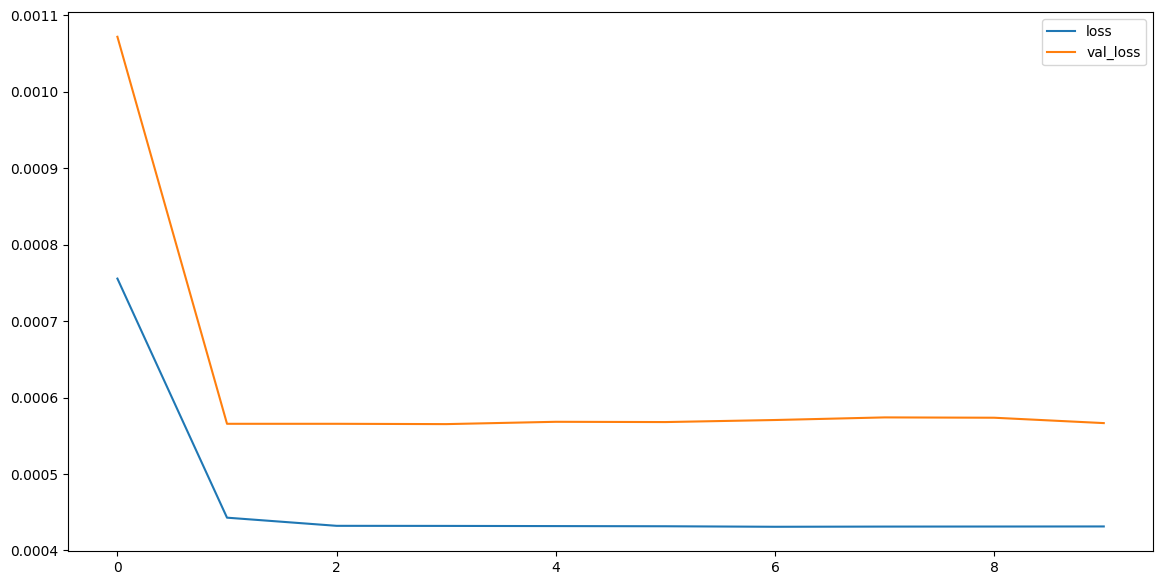

In [20]:
plt.figure(figsize=(14,7))
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [34]:
get_features = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name=model.get_config()['layers'][3]['config']['name']).output,
)

In [35]:
features = get_features.predict(X_test[indices])

16/16 [==============================] - 0s 3ms/step


In [ ]:
correlation_matrix = np.corrcoef(features)
np.save('correlation_matrix', correlation_matrix)
np.save('ticket', tickets_first)

In [122]:
relations = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix[i])):
        if correlation_matrix[i][j] == 1:
            if i < j:
                relations.append([tickets_first[i], tickets_first[j]])

In [124]:
df_relation = pd.DataFrame(data =relations,columns = ['Source', 'Target'])
df_relation.set_index("Source", inplace=True)
df_relation.to_csv('data/relation.csv')

In [202]:
y_pred_pct = model.predict(X_test[indices])
y_pred = []
y_test = []
ticketss = []
for ticket, y_pred_pct_sample in zip(tickets_first, y_pred_pct):
    if math.isnan(df_total[ticket][3273]) == False:
        y_pred.append(df_total[ticket][3273] +  df_total[ticket][3273]*y_pred_pct_sample[0])
        y_test.append(df_total[ticket][3273])
        ticketss.append(ticket)

# Stock CEG was removed because it hasn't listed on the exchange on January 1, 2022

16/16 [==============================] - 0s 5ms/step


In [194]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.17023146258404148

In [209]:
df_pred = pd.DataFrame(columns = ['Ticket', 'True', 'Predict'])
df_pred['Ticket'] = ticketss
df_pred['True'] = y_test
df_pred['Predict'] = y_pred
df_pred.set_index('Ticket', inplace=True)
df_pred.to_csv('data/prediction.csv')